In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

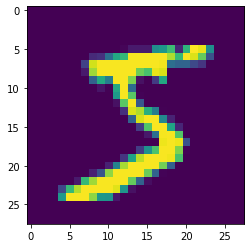

In [4]:
plt.imshow(x_train[0])

In [8]:
x_train = x_train / 255

In [9]:
x_test = x_test / 255

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [11]:
28*28

784

In [12]:
784/2

392.0

In [13]:
encoder = Sequential()

encoder.add(Flatten(input_shape = [28,28]))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [14]:
decoder = Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [15]:
autoencoder = Sequential([encoder,decoder])

In [16]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(learning_rate=1.5),
                   metrics=['accuracy'])

In [20]:
autoencoder.fit(x_train,x_train,epochs=5,
               validation_data=[x_test,x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2394 - accuracy: 0.7915 - val_loss: 0.1905 - val_accuracy: 0.7954
Epoch 2/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1747 - accuracy: 0.7996 - val_loss: 0.1639 - val_accuracy: 0.8014
Epoch 3/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1557 - accuracy: 0.8029 - val_loss: 0.1472 - val_accuracy: 0.8040
Epoch 4/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1460 - accuracy: 0.8046 - val_loss: 0.1412 - val_accuracy: 0.8042
Epoch 5/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1403 - accuracy: 0.8057 - val_loss: 0.1397 - val_accuracy: 0.8058


In [21]:
passed_images = autoencoder.predict(x_test[:10])

Original image


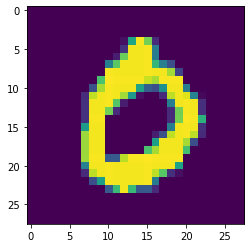

Attempted reconstruction after autoencoder


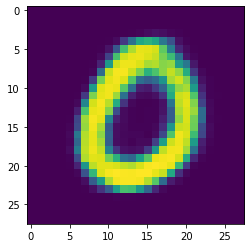

In [24]:
n = 3

print('Original image')
plt.imshow(x_test[n])
plt.show()
print("Attempted reconstruction after autoencoder")
plt.imshow(passed_images[n])

In [25]:
from tensorflow.keras.layers import GaussianNoise

In [26]:
sample = GaussianNoise(0.2)

In [28]:
noisey = sample(x_test[:10],training=True)

ORIGINAL


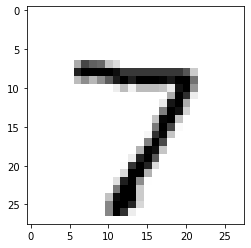

NOISEY


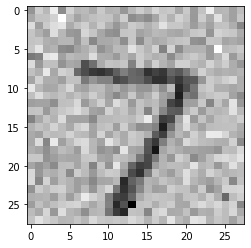

In [31]:
n = 0
print('ORIGINAL')
plt.imshow(x_test[n],cmap='binary')
plt.show()
print('NOISEY')
plt.imshow(noisey[n],cmap='binary')
plt.show()

In [32]:
import tensorflow as tf

In [33]:
tf.random.set_seed(101)

encoder = Sequential()

encoder.add(Flatten(input_shape = [28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [34]:
decoder = Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [35]:
noise_remover = Sequential([encoder,decoder])

In [36]:
noise_remover.compile(loss='binary_crossentropy',
                     optimizer=SGD(learning_rate=1.5),
                     metrics=['accuracy'])

In [38]:
noise_remover.fit(x_train,x_train,epochs=8,
                  validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2541 - accuracy: 0.7913 - val_loss: 0.2286 - val_accuracy: 0.7936
Epoch 2/8
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1976 - accuracy: 0.7963 - val_loss: 0.1728 - val_accuracy: 0.7974
Epoch 3/8
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1633 - accuracy: 0.8016 - val_loss: 0.1502 - val_accuracy: 0.8034
Epoch 4/8
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1495 - accuracy: 0.8044 - val_loss: 0.1422 - val_accuracy: 0.8020
Epoch 5/8
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1407 - accuracy: 0.8062 - val_loss: 0.1347 - val_accuracy: 0.8043
Epoch 6/8
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1359 - accuracy: 0.8069 - val_loss: 0.1292 - val_accuracy: 0.8066
Epoch 7/8
60000/60000 [==============================] -

In [39]:
ten_noisey_images = sample(x_test[:10],training=True)

In [40]:
denoised = noise_remover(ten_noisey_images)

ORIGINAL IMAGE


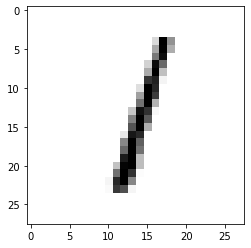

NOISE ADDED IMAGE


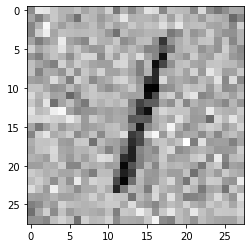

AFTER NOISE REMOVAL FROM AUTOENCODER


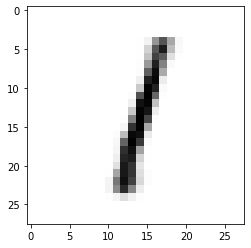

In [49]:
n = 2

print('ORIGINAL IMAGE')
plt.imshow(x_test[n],cmap='binary')
plt.show()
print('NOISE ADDED IMAGE')
plt.imshow(ten_noisey_images[n],cmap='binary')
plt.show()
print('AFTER NOISE REMOVAL FROM AUTOENCODER')
plt.imshow(denoised[n],cmap='binary')
plt.show()